# Exercise 2

In [1]:
import numpy as np
import numpy.random as npr
import math

def mad(x):
    return 1/len(x) * np.sum( np.abs(x - np.mean(x)) )

def skew(x):
    mean = np.mean(x)
    sigma = np.std(x)
    return 1/len(x) * np.sum( ((x - mean)**3)/sigma**3 )

R = 1000
within_mad = [0.0, 0.0, 0.0]
within_skew = [0.0, 0.0, 0.0]
theo_mad = 2*np.exp(0.5)*math.erf(1/(2*np.sqrt(2)))
theo_skew = (np.e + 2) * np.sqrt(np.e - 1)

npr.seed(0)
for _ in range(R):
    x = np.exp(npr.normal(0, 1, 500)) # Generate sample from specified distribution
    
    bootstrap_mad = np.array([mad(npr.choice(x, replace=True, size=500)) for _ in range(1000)])
    sample_mad = np.mean(bootstrap_mad)
    se = np.sqrt(np.var(bootstrap_mad))
    norm_range_mad = [sample_mad - 1.96*se, sample_mad + 1.96*se]
    perc_range_mad = np.percentile(bootstrap_mad, [2.5, 97.5])
    pivot_range_mad = [2*sample_mad - perc_range_mad[1], 2*sample_mad - perc_range_mad[0]] 
    within_mad[0] += (norm_range_mad[0] <= theo_mad) and (norm_range_mad[1] >= theo_mad)
    within_mad[1] += (perc_range_mad[0] <= theo_mad) and (perc_range_mad[1] >= theo_mad)
    within_mad[2] += (pivot_range_mad[0] <= theo_mad) and (pivot_range_mad[1] >= theo_mad)
    
    bootstrap_skew = np.array([skew(npr.choice(x, replace=True, size=500)) for _ in range(1000)])
    sample_skew = np.mean(bootstrap_skew)
    se = np.sqrt(np.var(bootstrap_skew))
    norm_range_skew = [sample_skew - 1.96*se, sample_skew + 1.96*se]
    perc_range_skew = np.percentile(bootstrap_skew, [2.5, 97.5])
    pivot_range_skew = [2*sample_skew - perc_range_skew[1], 2*sample_skew - perc_range_skew[0]] 
    within_skew[0] += (norm_range_skew[0] <= theo_skew) and (norm_range_skew[1] >= theo_skew)
    within_skew[1] += (perc_range_skew[0] <= theo_skew) and (perc_range_skew[1] >= theo_skew)
    within_skew[2] += (pivot_range_skew[0] <= theo_skew) and (pivot_range_skew[1] >= theo_skew)

print('Coverage for the MAD with normal: ', within_mad[0]/R)
print('Coverage for the MAD with percentile: ', within_mad[1]/R)
print('Coverage for the MAD with pivot: ', within_mad[2]/R)

print('Coverage for the skew with normal: ', within_skew[0]/R)
print('Coverage for the skew with percentile: ', within_skew[1]/R)
print('Coverage for the skew with pivot: ', within_skew[2]/R)

Coverage for the MAD with normal:  0.93
Coverage for the MAD with percentile:  0.933
Coverage for the MAD with pivot:  0.922
Coverage for the skew with normal:  0.299
Coverage for the skew with percentile:  0.255
Coverage for the skew with pivot:  0.296


## Discussion on coverage

The coverage calculated for the skewness is clearly much lower than for the MAD. This is possibly due to the distribution of the skewness measure not being symmetric, so the proposed ways to calculate a confidence interval may be ill-posed to represent the measure. We may verify this plotting a histogram of the values of the bootstrapped skewness

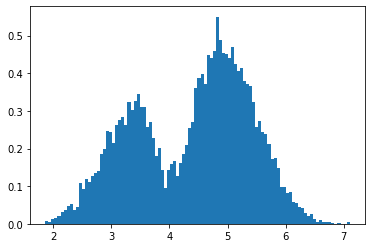

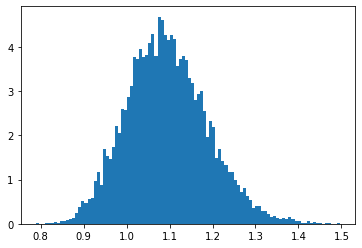

In [12]:
import matplotlib.pyplot as plt

x = np.exp(npr.normal(0, 1, 500)) # Generate sample from specified distribution
bootstrap_skew = np.array([skew(npr.choice(x, replace=True, size=500)) for _ in range(10000)])

plt.hist(bootstrap_skew, bins=100, density=True)
plt.show()

bootstrap_mad = np.array([mad(npr.choice(x, replace=True, size=500)) for _ in range(10000)])
plt.hist(bootstrap_mad, bins=100, density=True)
plt.show()

From different executions of the previous code block, the distribution of the bootstrapped skewness seems inconsistent, sometimes following a multimodal and sometimes following something resembling a normal distribution, while the MAD follows a more unimodal distribution very consistently. This is probably why the confidence interval of the skewedness has a much lower coverage

# Exercise 5

In [2]:
errors = []
for i in range(100000):
    sample = npr.uniform(1, 3, 10)
    estimation = (np.amax(sample) + np.amin(sample))/2
    errors.append( (estimation - 2)**2 )

print('MSE: ', np.sum(errors)/len(errors))

MSE:  0.015194947483219656
